In [1]:
# !pip install -e ~/tools/tvbo-python/

from tvbo.api.ontology_api import OntologyAPI
import matplotlib.pyplot as plt
import networkx as nx
from tvbo import plot


def plot_graph(data, figsize=(8, 4), edge_kwargs=dict(linewidth=0.3), node_kwargs={}):
    fig, ax = plt.subplots(figsize=figsize)
    # ax.text(0, 0, "test")
    # Initialize a directed graph
    G = nx.MultiDiGraph()

    # Add nodes with attributes
    for node in data["nodes"]:
        if node["id"] is not None:
            G.add_node(node["id"], label=node["label"], type=node["type"])

    # Add edges (links)
    for link in data["links"]:
        if link["source"] is not None and link["target"] is not None:
            G.add_edge(link["source"], link["target"], type=link["type"])

    # Define the position layout
    pos = nx.spring_layout(G, k=0.002, iterations=50)

    # Draw the graph
    plot.graph.draw_custom_nodes(
        G, pos, labels=nx.get_node_attributes(G, "label"), ax=ax, **node_kwargs
    )
    plot.graph.draw_custom_edges(
        G, pos, edge_labels=True, ax=ax, line_kwargs=edge_kwargs
    )
    # nx.draw(G, pos, with_labels=False, node_size=3000, node_color='lightblue', font_size=8, font_weight='bold', arrowsize=15)

    # # Draw node labels
    # labels = nx.get_node_attributes(G, 'label')
    # # nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'type'), font_size=8)
    # print(nx.get_edge_attributes(G, "type"))
    # Show the plot
    plt.title("Graph Visualization")
    plt.axis("off")
    plt.close()
    return fig

In [2]:
api = OntologyAPI()
data = api.query_nodes("JansenRit")
data

{'nodes': [{'id': 3,
   'iri': 'http://www.thevirtualbrain.org/tvb-o/JansenRit',
   'label_alt': 'JansenRit',
   'label': 'JansenRit',
   'type': 'Neural Mass Model',
   'definition': 'The Jansen-Rit is a neurophysiologically-inspired neural mass model of a cortical column (or area), developed to simulate the electrical brain activity, i.e., the electroencephalogram (EEG), and evoked-potentials (EPs; Jansen et al., 1993; Jansen & Rit, 1995).\n\nThe Jansen-Rit is a 6-dimensional, non-linear, model describing the local average states of three interconnected neural populations: pyramidal cells (PCs), excitatory and inhibitory interneurons (EINs and IINs), interacting through positive and negative feedback loops. The main output of the model is the average membrane potential of the pyramidal cell population, as the sum of the potential of these cells is thought to be the source of the potential recorded in the EEG.'},
  {'id': 284,
   'iri': 'http://www.thevirtualbrain.org/tvb-o/SigmoidalJ

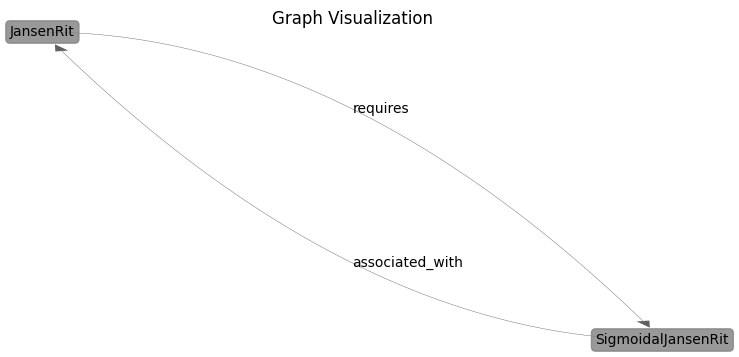

In [3]:
plot_graph(api.graph)

In [4]:
api.expand_node_relationships("JansenRit")
api.update_graph()

{'nodes': [{'id': 3,
   'iri': 'http://www.thevirtualbrain.org/tvb-o/JansenRit',
   'label_alt': 'JansenRit',
   'label': 'JansenRit',
   'type': 'Neural Mass Model',
   'definition': 'The Jansen-Rit is a neurophysiologically-inspired neural mass model of a cortical column (or area), developed to simulate the electrical brain activity, i.e., the electroencephalogram (EEG), and evoked-potentials (EPs; Jansen et al., 1993; Jansen & Rit, 1995).\n\nThe Jansen-Rit is a 6-dimensional, non-linear, model describing the local average states of three interconnected neural populations: pyramidal cells (PCs), excitatory and inhibitory interneurons (EINs and IINs), interacting through positive and negative feedback loops. The main output of the model is the average membrane potential of the pyramidal cell population, as the sum of the potential of these cells is thought to be the source of the potential recorded in the EEG.'},
  {'id': 284,
   'iri': 'http://www.thevirtualbrain.org/tvb-o/SigmoidalJ

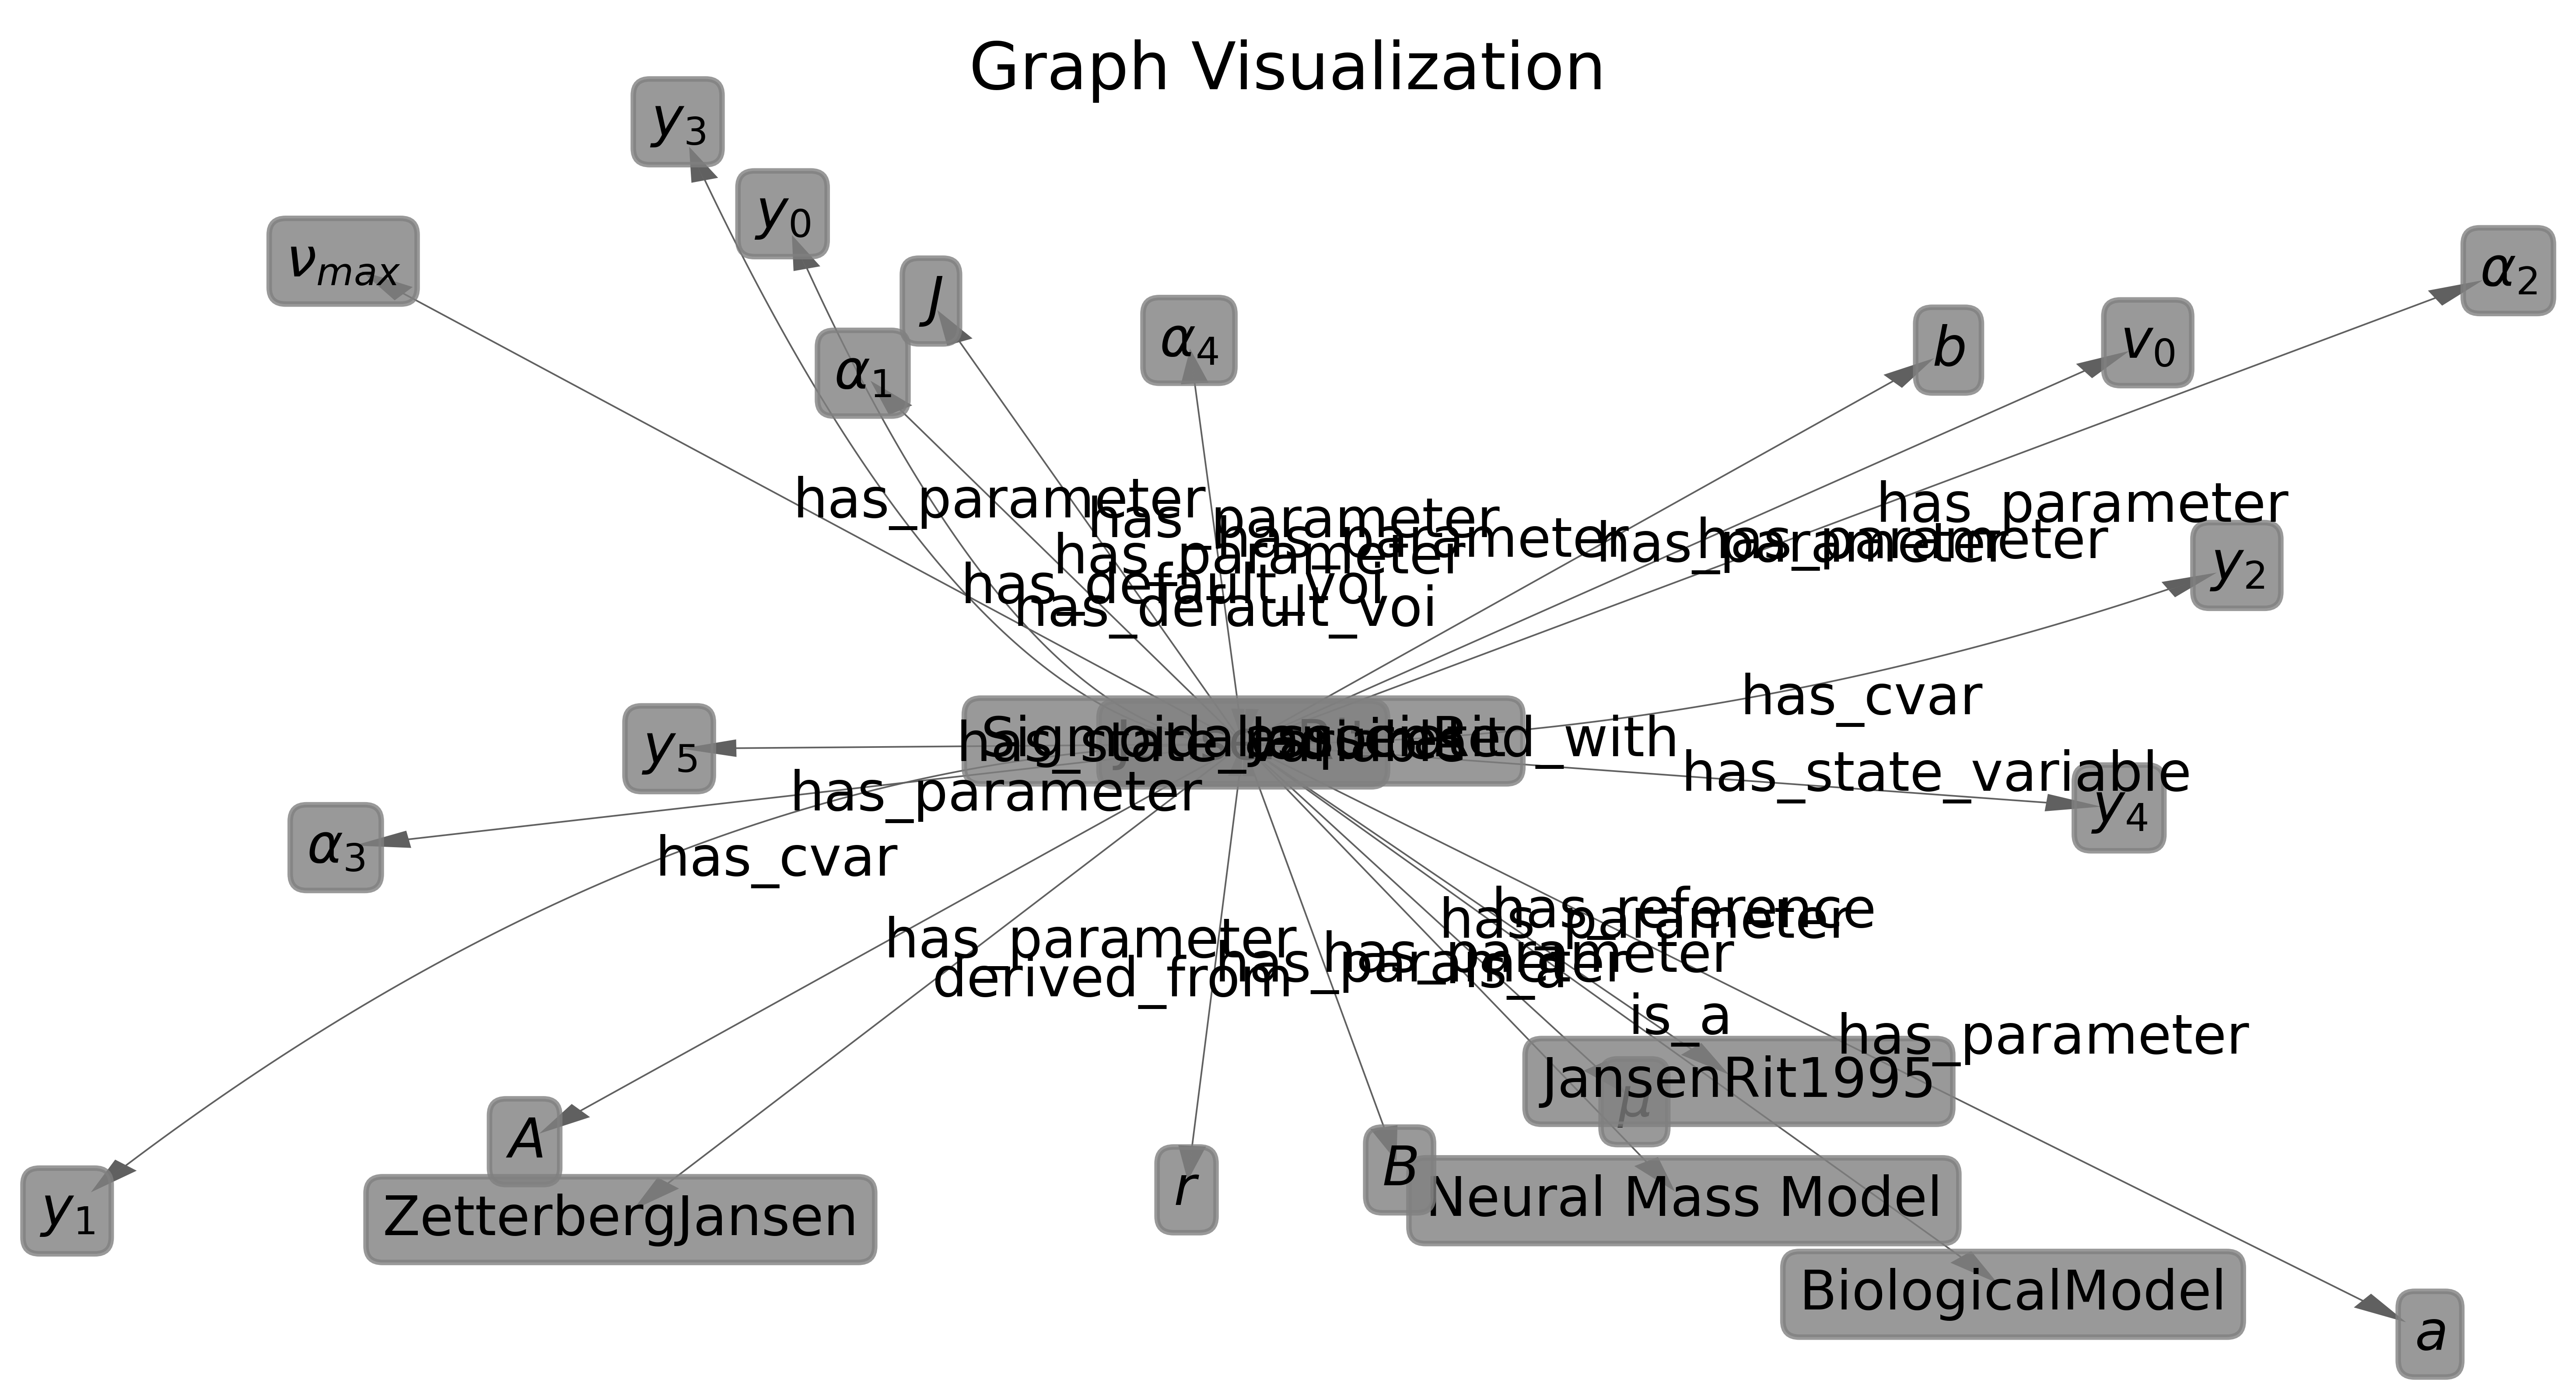

In [5]:
fig = plot_graph(api.graph)
fig.set_dpi(900)
fig